In [1]:
# Importing necessary libraries
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting up model parameters and loading the segmentation model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cpu"

# Loading the segmentation model based on the specified type and checkpoint
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Initializing the mask generator with the loaded model
mask_generator = SamAutomaticMaskGenerator(sam)

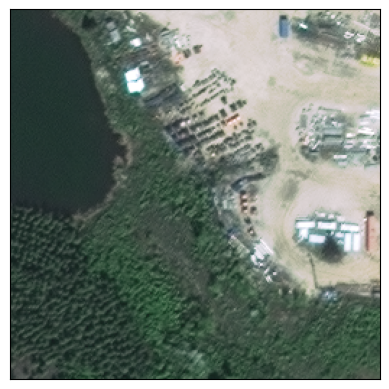

In [20]:
# Loading and displaying the original image
image_path = 'E:/BEEILAB/Codding/SAM/Data/2.tif'
image = plt.imread(image_path)

# Displaying the loaded image using matplotlib
plt.imshow(image)
plt.xticks([])  # Removing x-axis ticks
plt.yticks([])  # Removing y-axis ticks
plt.show()

In [21]:
# Generating masks for the loaded image
masks = mask_generator.generate(image)

In [22]:
# Printing information about the generated masks
print(len(masks))           # Number of masks
print(masks[0].keys())       # Keys associated with the first mask in the list

77
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [23]:
def show_anns(anns): # Defining a function to visualize segmentation annotations
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True) # Sorting annotations by area in descending order
    ax = plt.gca() # Setting up the plot
    ax.set_autoscale_on(False)
    # Creating an initial image array with alpha channel for transparency
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    # Adding colored masks to the image array
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])  # Random color with transparency
        img[m] = color_mask
    ax.imshow(img) # Displaying the final image with overlaid masks

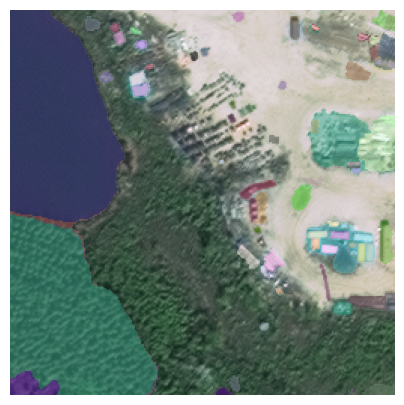

In [25]:
# Setting up the plot for displaying the original image and segmented objects
plt.figure(figsize=(5,5))
plt.imshow(image)

# Calling the show_anns function to overlay masks on the original image
show_anns(masks)

# Configuring plot aesthetics
plt.axis('off')  # Turning off axis labels
plt.show()